# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [542]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl
%pylab inline
PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [509]:
# Load dataset
data = pd.read_csv("/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9", usecols = ['Community Board', 'Complaint Type', 'Borough','Created Date','Agency Name','Descriptor','Resolution Description'])


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [510]:
# Check if all Boroughs and Community Districts are represented in the Data 
data1= data
print(data1.shape)
data1.head()

(10187766, 7)


,Created Date,Agency Name,Complaint Type,Descriptor,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Department of Transportation,Street Condition,Pothole,NaN,13 BROOKLYN,BROOKLYN
1,11/05/2015 02:09:49 AM,CHALL,Opinion for the Mayor,HOUSING,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,11/05/2015 02:06:51 AM,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,New York City Police Department,Illegal Parking,Blocked Hydrant,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,11/05/2015 01:57:20 AM,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,The Human Resources Administration received yo...,0 Unspecified,Unspecified


In [511]:
# How many unique values do we have? 
print("the community districts has %d unique values"%len(data1[u'Community Board'].unique()))
data1[u'Community Board'].unique()

the community districts has 77 unique values


array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

In [512]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [513]:
# Check for duplicates? Are these plausible?
print("Total number of duplicated values %s"%data1.duplicated().sum())

Total number of duplicated values 2029729


In [514]:
data1 = data1.drop_duplicates()  #dropped dupicated rows() based on samedate sametime,the reports are duplicate)
print(data1.shape)
print(data1.isnull().sum())  #checking null values in columns

(8158037, 7)
Created Date                    0
Agency Name                     0
Complaint Type                  0
Descriptor                  31056
Resolution Description    3623404
Community Board                 0
Borough                         0
dtype: int64


#### null values in resolution descriptor Column

In [515]:
data1 = data1[data1[u'Community Board'] != '0 Unspecified']  #removing unspecfied/missing entries
data1 = data1[data1[u'Community Board'] != 'Unspecified QUEENS']
data1 = data1[data1[u'Community Board'] != 'Unspecified BROOKLYN']
data1 = data1[data1[u'Community Board'] != 'Unspecified MANHATTAN']
data1 = data1[data1[u'Community Board'] != 'Unspecified BRONX']
data1 = data1[data1[u'Community Board'] != 'Unspecified STATEN ISLAND']
data1 = data1[data1[u'Community Board'] != '64 MANHATTAN']   #removing unplausible commmunity districts
data1 = data1[data1[u'Community Board'] != '81 QUEENS']
data1 = data1[data1[u'Community Board'] != '55 BROOKLYNN']
data1 = data1[data1[u'Community Board'] != '83 QUEENS']
data1 = data1[data1[u'Community Board'] != '28 BRONX']
data1 = data1[data1[u'Community Board'] != '80 QUEENS']
data1 = data1[data1[u'Community Board'] != '95 STATEN ISLAND']
data1 = data1[data1[u'Community Board'] != '26 BRONX']
data1 = data1[data1[u'Community Board'] != '82 QUEENS']
data1 = data1[data1[u'Community Board'] != '56 BROOKLYN']
data1 = data1[data1[u'Community Board'] != '84 QUEENS']
data1 = data1[data1[u'Community Board'] != '80 QUEENS']
data1 = data1[data1[u'Community Board'] != '55 BROOKLYN']
data1 = data1[data1[u'Community Board'] != '27 BRONX']
print("the unique community districts are ", len(data1[u'Community Board'].unique()))
data1[u'Community Board'].unique()   #to have 59 commmunity districts

('the unique community districts are ', 59)


array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

### trying to fill missing values in resolution description with complaint types

In [516]:
data2 =data1.fillna(0)  #filling NaN values with 0 in resolution Description

In [517]:
print(data2.shape)
data2.head()

(7009704, 7)


,Created Date,Agency Name,Complaint Type,Descriptor,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Department of Transportation,Street Condition,Pothole,0,13 BROOKLYN,BROOKLYN
2,11/05/2015 02:06:51 AM,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,New York City Police Department,Illegal Parking,Blocked Hydrant,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
5,11/05/2015 01:55:55 AM,Department of Transportation,Highway Condition,Pothole - Highway,The Department of Transportation requires 10 d...,02 STATEN ISLAND,STATEN ISLAND
7,11/05/2015 01:47:12 AM,New York City Police Department,Noise - Commercial,Loud Music/Party,Your complaint has been forwarded to the New Y...,08 MANHATTAN,MANHATTAN


In [518]:
for i in range(100000):   #using complaint types to fill missings in Resolution Descriptor
    if data2.iloc[i:i+1,4].item() == 0:
        data2.iloc[i:i+1,4] = data2.iloc[i:i+1,2].item()
data2.head(5)

,Created Date,Agency Name,Complaint Type,Descriptor,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Department of Transportation,Street Condition,Pothole,Street Condition,13 BROOKLYN,BROOKLYN
2,11/05/2015 02:06:51 AM,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,New York City Police Department,Illegal Parking,Blocked Hydrant,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
5,11/05/2015 01:55:55 AM,Department of Transportation,Highway Condition,Pothole - Highway,The Department of Transportation requires 10 d...,02 STATEN ISLAND,STATEN ISLAND
7,11/05/2015 01:47:12 AM,New York City Police Department,Noise - Commercial,Loud Music/Party,Your complaint has been forwarded to the New Y...,08 MANHATTAN,MANHATTAN


#### it works for small data but originally the data is too big, so i got stuck here if i pass the len(data2) in range to iterate the rows of data

In [519]:
red_df = data1.groupby('Community Board').count()# Safe reduced data frame (Community District level)
red_df.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Resolution Description,Borough
Community Board,,,,,,
01 BRONX,61597,61597,61597,61278,41587,61597
01 BROOKLYN,171464,171464,171464,170526,90922,171464
01 MANHATTAN,76644,76644,76644,75769,39215,76644
01 QUEENS,159608,159608,159608,159060,91219,159608
01 STATEN ISLAND,169761,169761,169761,169226,76921,169761


In [520]:
red_df.drop([u'Created Date', u'Agency Name', u'Descriptor',
       u'Resolution Description', u'Borough'], axis =1, inplace =True)
red_df.rename(columns={'Complaint Type': 'ComplaintNumbers'}, inplace = True)
red_df['Rank'] = red_df['ComplaintNumbers'].rank(ascending=1)
red_df.sort_values(by = 'Rank', inplace = True)
red_df= red_df.reset_index()
red_df.head()

,Community Board,ComplaintNumbers,Rank
0,02 BRONX,49113,1.0
1,03 BRONX,60432,2.0
2,01 BRONX,61597,3.0
3,13 BROOKLYN,64992,4.0
4,16 BROOKLYN,70888,5.0


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

### Part2: Demographics Data

In [521]:
# Population by Community District
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [522]:
# Check variables in file
df_pop = df_pop[['FIPS','cd_id','Median household income (In 2014 Inflation Adjusted Dollars)']]
print(df_pop.columns)
df_pop.head()

Index([u'FIPS', u'cd_id',
       u'Median household income (In 2014 Inflation Adjusted Dollars)'],
      dtype='object')


,FIPS,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,3603701,BX08,54224
1,3603702,BX12,44906
2,3603703,BX10,54962
3,3603704,BX11,47910
4,3603705,BX03,22041


In [523]:
# How many community districts are in file? 
print("the total community districts are ",len(df_pop['cd_id'].unique()))
df_pop['cd_id'].unique()

('the total community districts are ', 59)


array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [524]:
df_pop['cd_id'][15] = 'MN11'
df_pop.head()

,FIPS,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,3603701,BX08,54224
1,3603702,BX12,44906
2,3603703,BX10,54962
3,3603704,BX11,47910
4,3603705,BX03,22041


### Part3: Infrastructure Data

In [525]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
print(df_infr.columns)
df_infr.head()

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [526]:
# How many community districts are in file? 
len(df_infr['Qualifying Name'].unique())

55

In [527]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr['MobileSubscription'] = df_infr['Households: With Mobile Broadband']+ df_infr['Households: With Mobile Broadband.1']+ df_infr['Households: With Mobile Broadband.2'] +df_infr['Households: With Mobile Broadband.4'] +df_infr['Households: Without Mobile Broadband.3']
df_infr = df_infr[['Qualifying Name', 'MobileSubscription']]
df_infr.head()

,Qualifying Name,MobileSubscription
0,"NYC-Bronx Community District 8--Riverdale, New...",15360
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10617
2,"NYC-Bronx Community District 10--Co-op City, N...",11425
3,NYC-Bronx Community District 11--Pelham Parkwa...,10574
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14879


In [528]:
# Aggregate internet type by high and low connections
df_infr['Connections'] = np.nan
for i in range(len(df_infr)):
    if (df_infr['MobileSubscription'][i] - df_infr['MobileSubscription'].median() > 0):
        df_infr['Connections'][i] = 'High'
    else:
        df_infr['Connections'][i] = 'Low'
df_infr.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Qualifying Name,MobileSubscription,Connections
0,"NYC-Bronx Community District 8--Riverdale, New...",15360,High
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10617,Low
2,"NYC-Bronx Community District 10--Co-op City, N...",11425,Low
3,NYC-Bronx Community District 11--Pelham Parkwa...,10574,Low
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14879,High


In [529]:
# Save data frame 
df_infr.sort_values(by='MobileSubscription', inplace =True)
df_infr.head()

,Qualifying Name,MobileSubscription,Connections
33,NYC-Brooklyn Community District 16--Brownsvill...,5517,Low
58,NYC-Queens Community District 14--Far Rockaway...,6121,Low
44,NYC-Brooklyn Community District 13--Brighton B...,7242,Low
51,NYC-Queens Community District 4--Elmhurst & So...,7294,Low
34,NYC-Brooklyn Community District 5--East New Yo...,8325,Low


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [530]:
# Harmonize identifier of dataframe 1
df1= red_df
df1['number']= df1['Community Board'].str.extract('(\d\d)', expand=True)
df1['name'] = df1['Community Board'].str.extract('([A-Z]\w{0,})', expand=True)
df1['final'] = df1['name'].str.replace('BRONX', 'BX')
df1['final'] = df1['final'].str.replace('BROOKLYN', 'BK')
df1['final'] = df1['final'].str.replace('MANHATTAN', 'MN')
df1['final'] = df1['final'].str.replace('QUEENS', 'QN')
df1['final'] = df1['final'].str.replace('STATEN', 'SI')
df1['cd_id'] = df1['final'] + df1['number']
df1.drop(['Community Board','number','name','final'], axis=1, inplace = True)
df1.head()

,ComplaintNumbers,Rank,cd_id
0,49113,1.0,BX02
1,60432,2.0,BX03
2,61597,3.0,BX01
3,64992,4.0,BK13
4,70888,5.0,BK16


In [531]:
# Harmonize identifier of dataframe 2
df_pop.drop(['FIPS'], axis=1, inplace = True)
df_pop.head()

,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [532]:
# Harmonize identifier of dataframe 3

In [533]:
a = df_infr['Qualifying Name'].str.split(' ', expand=True)
df_infr['name']= a[0].str.split('-',expand = True)[1]
df_infr['final'] = df_infr['name'].str.replace('Brooklyn','BK')
df_infr['final'] = df_infr['final'].str.replace('Manhattan','MN')
df_infr['final'] = df_infr['final'].str.replace('Staten','SI')
df_infr['final'] = df_infr['final'].str.replace('Bronx','BX')
df_infr['final'] = df_infr['final'].str.replace('Queens','QN')
df_infr.head()

,Qualifying Name,MobileSubscription,Connections,name,final
33,NYC-Brooklyn Community District 16--Brownsvill...,5517,Low,Brooklyn,BK
58,NYC-Queens Community District 14--Far Rockaway...,6121,Low,Queens,QN
44,NYC-Brooklyn Community District 13--Brighton B...,7242,Low,Brooklyn,BK
51,NYC-Queens Community District 4--Elmhurst & So...,7294,Low,Queens,QN
34,NYC-Brooklyn Community District 5--East New Yo...,8325,Low,Brooklyn,BK


In [534]:
df_infr['1'] = df_infr['Qualifying Name'].str.extract('(\d+)', expand=True)
df_infr['2'] = df_infr['Qualifying Name'].str.extract('(\d+\W+\d+)', expand=True)
df_infr['3'] = df_infr['Qualifying Name'].str.extract('(\d+)(?!.*\d)', expand = True)
df_infr = df_infr.fillna(0)
df_infr.head()

,Qualifying Name,MobileSubscription,Connections,name,final,1,2,3
33,NYC-Brooklyn Community District 16--Brownsvill...,5517,Low,Brooklyn,BK,16,0,16
58,NYC-Queens Community District 14--Far Rockaway...,6121,Low,Queens,QN,14,0,14
44,NYC-Brooklyn Community District 13--Brighton B...,7242,Low,Brooklyn,BK,13,0,13
51,NYC-Queens Community District 4--Elmhurst & So...,7294,Low,Queens,QN,4,0,4
34,NYC-Brooklyn Community District 5--East New Yo...,8325,Low,Brooklyn,BK,5,0,5


In [535]:
for i in range(len(df_infr)):   #duplicating rows with values 1 & 2 in column name '2'
    if df_infr.iloc[i:i+1,6].item() != 0:
        df_infr = df_infr.append(df_infr.iloc[i:i+1],ignore_index= True)
for i in range(len(df_infr)):  #taking value 2 in 1&2 type entries in column name '1'
    if df_infr.duplicated().iloc[i:i+1].item() == True:
        df_infr.iloc[i:i+1,5] = df_infr.iloc[i:i+1,7].item()
df_infr['1'] = df_infr['1'].apply(lambda x: x.zfill(2)) #making entries double digit in column name '1'
print(df_infr.shape)
df_infr.head()

(67, 8)


,Qualifying Name,MobileSubscription,Connections,name,final,1,2,3
0,NYC-Brooklyn Community District 16--Brownsvill...,5517,Low,Brooklyn,BK,16,0,16
1,NYC-Queens Community District 14--Far Rockaway...,6121,Low,Queens,QN,14,0,14
2,NYC-Brooklyn Community District 13--Brighton B...,7242,Low,Brooklyn,BK,13,0,13
3,NYC-Queens Community District 4--Elmhurst & So...,7294,Low,Queens,QN,04,0,4
4,NYC-Brooklyn Community District 5--East New Yo...,8325,Low,Brooklyn,BK,05,0,5


In [537]:
df_infr['cd_id'] = df_infr[['final', '1']].apply(lambda x: ''.join(x), axis = 1)
df_infr.drop(['Qualifying Name', 'name', '2', '3', '1', 'final'], axis = 1, inplace=True)
df_infr.head()

,MobileSubscription,Connections,cd_id
0,5517,Low,BK16
1,6121,Low,QN14
2,7242,Low,BK13
3,7294,Low,QN04
4,8325,Low,BK05


In [538]:
# Link the 3 dataframes
comp_demo = pd.merge(df1, df_pop, on='cd_id', how = 'outer')
comp_demo_infr = pd.merge(comp_demo, df_infr, on='cd_id', how = 'outer')
comp_demo_infr.head()

,ComplaintNumbers,Rank,cd_id,Median household income (In 2014 Inflation Adjusted Dollars),MobileSubscription,Connections
0,49113,1.0,BX02,21116,15810,High
1,49113,1.0,BX02,21116,15810,High
2,49113,1.0,BX02,21116,15810,High
3,60432,2.0,BX03,22041,14879,High
4,61597,3.0,BX01,21116,15810,High


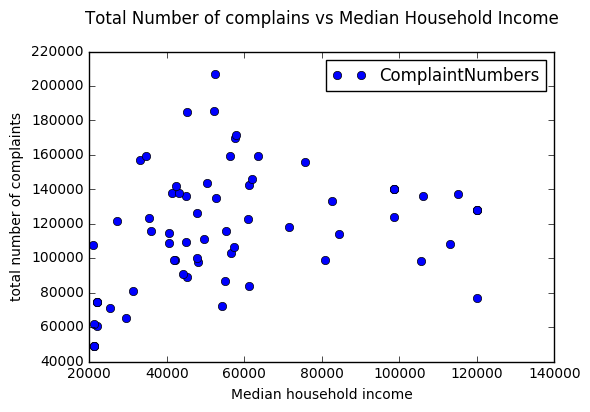

In [544]:
pl.plot(comp_demo_infr['Median household income (In 2014 Inflation Adjusted Dollars)'], \
        comp_demo_infr['ComplaintNumbers'], 'o')
pl.xlabel('Median household income')
pl.ylabel('total number of complaints')
pl.title('Total Number of complains vs Median Household Income\n')
pl.legend()
pl.show()

### As we see,  Community districts with median income of betwenn 40,000 USD to 80,000 USD make the most 311 calls.

community districts with low income are less likely to make 311 calls. Most community districts with a median income of more than 40,000 USD make more than 100,000 calls.

There is no proportional increase in 311 calls made by high median income group (median income > 100,000 USD) and those community districts make average if not less 311 calls as compared to the middle median income group

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


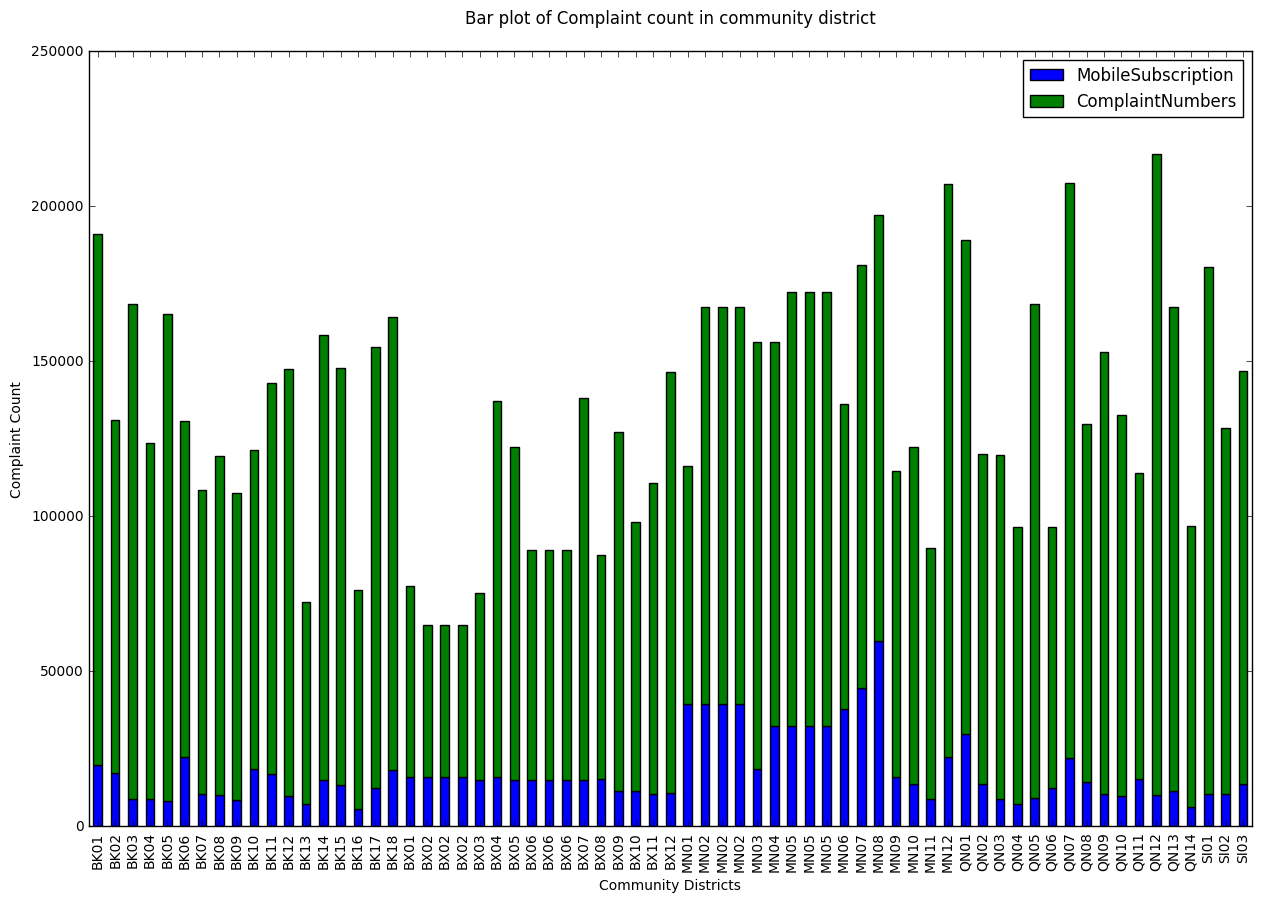

In [552]:
final = comp_demo_infr.set_index('cd_id')
ax = final[[ 'MobileSubscription','ComplaintNumbers',]].sort().plot(kind='bar',stacked = True ,figsize=(15, 10))
pl.xlabel('Community Districts')
pl.ylabel('Complaint Count')
pl.title('Bar plot of Complaint count in community district\n')
pl.legend()
pl.show()

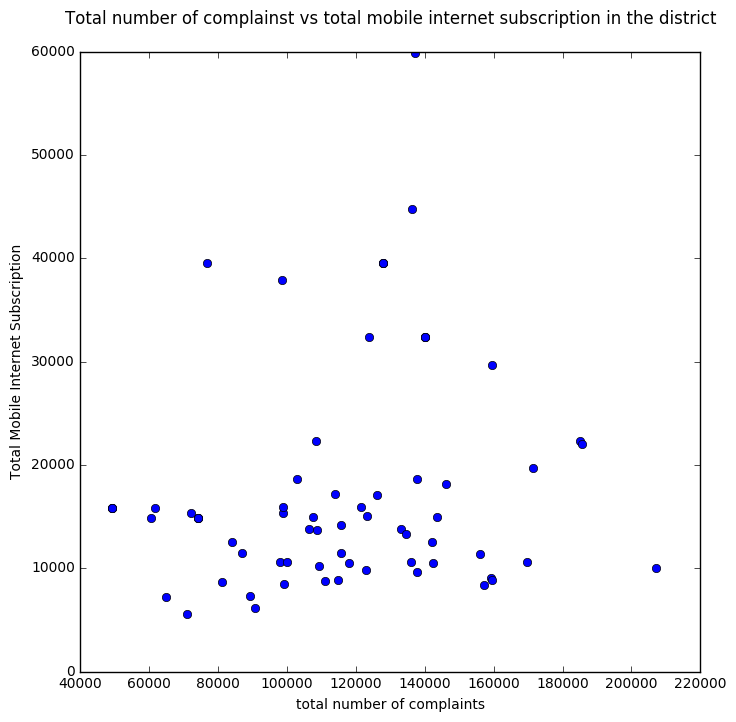

In [550]:
pl.figure(figsize= (8,8))
pl.plot(comp_demo_infr['ComplaintNumbers'], \
        comp_demo_infr['MobileSubscription'], 'o')
pl.xlabel('total number of complaints')
pl.ylabel('Total Mobile Internet Subscription')
pl.title('Total number of complainst vs total mobile internet subscription in the district\n')
pl.show()

### Complain count varies from 10,000 to 20,000 without any significant change in mobile internet subscription

Districts with high mobile internet subscription do not have proportional increase in complaint counts

In [419]:
df_infr['cd_id'] = df_infr[['final', '1']].apply(lambda x: ''.join(x), axis = 1)
for i in range(len(df_infr)):
    if df_infr[df_infr.duplicated() == True]:
        df_infr.iloc[i:i+1,5] = df_infr.iloc[i:i+1,7].item() 


,Qualifying Name,MobileSubscription,Households: With An Internet Subscription,name,final,1,2,3,cd_id
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,31620,65426,Bronx,BX,01,1 & 2,2,BX01
1,"NYC-Bronx Community District 10--Co-op City, N...",11425,32729,Bronx,BX,10,0,10,BX10
2,NYC-Bronx Community District 11--Pelham Parkwa...,10574,32003,Bronx,BX,11,0,11,BX11
3,"NYC-Bronx Community District 12--Wakefield, Ne...",10617,32243,Bronx,BX,12,0,12,BX12
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",29758,71006,Bronx,BX,03,3 & 6,6,BX03
5,"NYC-Bronx Community District 4--Concourse, New...",15922,29376,Bronx,BX,04,0,4,BX04
6,NYC-Bronx Community District 5--Morris Heights...,14942,26332,Bronx,BX,05,0,5,BX05
7,"NYC-Bronx Community District 7--Bedford Park, ...",15085,31468,Bronx,BX,07,0,7,BX07
8,"NYC-Bronx Community District 8--Riverdale, New...",15360,31795,Bronx,BX,08,0,8,BX08
9,"NYC-Bronx Community District 9--Castle Hill, N...",11484,45976,Bronx,BX,09,0,9,BX09


In [ ]:
# Link the 3 dataframes

In [ ]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?